### Objectives:
1. Lasso and Ridge
2. Naïve Bayes
3. KNN
4. Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
# This dataset is biased, but I will use it for educational purposes
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=123)

## Fitting both Lasso and Ridge

In [ ]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso()
ridge = Ridge()
lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)

print("Lasso Coefficient:", *lasso.coef_, sep='\n\t')
print("Ridge Coefficient:", *ridge.coef_, sep='\n\t')
print('Sum of lasso abs values:', np.sum(np.abs(lasso.coef_)))
print('Sum of ridge abs values:', np.sum(np.abs(ridge.coef_)))

Lasso Coefficient:
	-0.06296576330463602
	0.035095663971902474
	0.0
	0.0
	-0.0
	2.2697913384628245
	0.00067795584661169
	-0.645065772635446
	0.19354572704933162
	-0.013508702669918602
	-0.6453458726466409
	0.004490421848032132
	-0.6731506757847043
Ridge Coefficient:
	-0.11105798056135398
	0.03658528048290756
	0.04692128541593161
	0.603824134801354
	-6.974605652267614
	5.118642851602443
	-0.026987022704628987
	-1.228242795071086
	0.24913980673174269
	-0.013989976538037142
	-0.8478133115629517
	0.0069542208771564825
	-0.4688164870854456
Sum of lasso abs values: 4.543637894220049
Sum of ridge abs values: 15.733580805702655



Let's try different values for alpha for Lasso and Ridge regressors then
plot the validation loss.

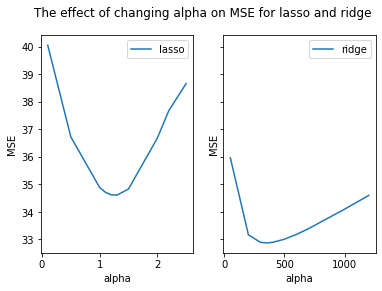

Best value of alpha for lasso: 1.3
Best value of alpha for ridge: 350


In [ ]:
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

lasso_alphas = [0.1, 0.5, 1, 1.1, 1.2, 1.3, 1.5, 2, 2.2, 2.5]
ridge_alphas = [50, 200, 300, 350, 400, 500, 600, 700, 1000, 1200]
lasso_losses = []
ridge_losses = []
for i in range(len(lasso_alphas)):
    # Create a Lasso regressor with the alpha value.
    # Fit it to the training set, then get the prediction of the validation set (x_val).
    # calculate the mean squared error loss, then append it to the losses array
    lasso = Lasso(alpha=lasso_alphas[i])
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_val)
    mse = mean_squared_error(y_val, y_pred)
    lasso_losses.append(mse)

    ridge = Ridge(alpha=ridge_alphas[i])
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_val)
    mse = mean_squared_error(y_val, y_pred)
    ridge_losses.append(mse)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle('The effect of changing alpha on MSE for lasso and ridge')

ax1.plot(lasso_alphas, lasso_losses, label='lasso')
ax1.legend()
ax1.set(xlabel='alpha', ylabel='MSE')

ax2.plot(ridge_alphas, ridge_losses, label='ridge')
ax2.legend()
ax2.set(xlabel='alpha', ylabel='MSE')

plt.show()

lasso_best_alpha = lasso_alphas[np.argmin(lasso_losses)]
ridge_best_alpha = ridge_alphas[np.argmin(ridge_losses)]
print("Best value of alpha for lasso:", lasso_best_alpha)
print("Best value of alpha for ridge:", ridge_best_alpha)

Measuring the loss on the test set with Lasso and ridge regressors with the
best alpha.

In [ ]:
lasso = Lasso(lasso_best_alpha)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print("Lasso MSE on test set:", mean_squared_error(y_test, y_pred))

ridge = Ridge(ridge_best_alpha)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
print("Ridge MSE on test set:", mean_squared_error(y_test, y_pred))

Lasso MSE on test set: 31.95376288082982
Ridge MSE on test set: 30.1198868652236


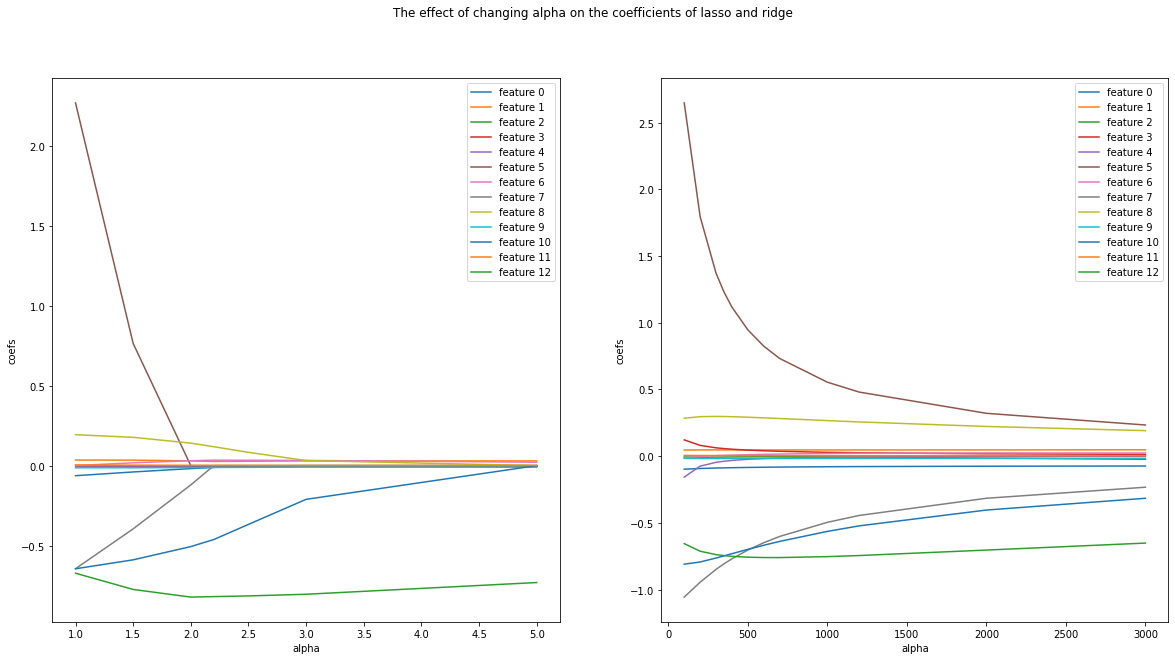

In [ ]:
# feature_names =

lasso_alphas = [1, 1.1, 1.2, 1.3, 1.5, 2, 2.2, 2.5, 3, 5]
ridge_alphas = [100, 200, 300, 350, 400, 500, 600, 700, 1000, 1200, 2000, 3000]
lasso_coefs_ = np.zeros((len(lasso_alphas), len(X[0])))
ridge_coefs_ = np.zeros((len(ridge_alphas), len(X[0])))
for i in range(len(lasso_alphas)):
    lasso = Lasso(alpha=lasso_alphas[i])
    lasso.fit(x_train, y_train)
    lasso_coefs_[i] = lasso.coef_

for i in range(len(ridge_alphas)):
    ridge = Ridge(alpha=ridge_alphas[i])
    ridge.fit(x_train, y_train)
    ridge_coefs_[i] = ridge.coef_

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('The effect of changing alpha on the coefficients of lasso and ridge')

for idx in range(len(X[0])):
    ax1.plot(lasso_alphas, lasso_coefs_[:, idx], label=f'feature {idx}')
ax1.legend()
ax1.set(xlabel='alpha', ylabel='coefs')

for idx in range(len(X[0])):
    ax2.plot(ridge_alphas, ridge_coefs_[:, idx], label=f'feature {idx}')
ax2.legend()
ax2.set(xlabel='alpha', ylabel='coefs')

plt.show()

In [ ]:
from sklearn.datasets import load_digits, load_iris

X, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# We will show why we didn't split a validation set.

## Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gauss_nb = GaussianNB()
gauss_nb.fit(x_train, y_train)
y_pred = gauss_nb.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8166666666666667


## K nearest neighbour classifier

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9722222222222222


Let's tune the hyperparameter $n\_neighbors$ in the KNN classifier object using the cross-validation.

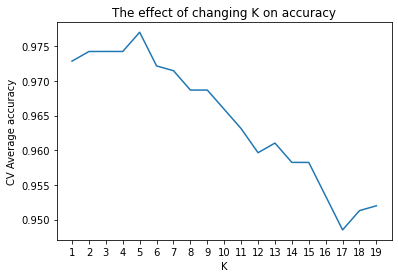

Best K: 5


In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
%matplotlib inline

Ks = list(range(1, 20))
cv_scores = []
for K in Ks:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, x_train, y_train,
                             cv=7, scoring='accuracy')
    avg_score = np.mean(scores)
    cv_scores.append(avg_score)

plt.title('The effect of changing K on accuracy')
plt.plot(Ks, cv_scores)
plt.xlabel('K')
plt.xticks(Ks)
plt.ylabel('CV Average accuracy')
plt.show()
print('Best K:', Ks[np.argmax(cv_scores)])

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':list(range(1, 11)),
              'weights':['uniform', 'distance'],
              'metric':['euclidean', 'manhattan', 'chebyshev', 'cosine']
              }

grid_search_clf = GridSearchCV(estimator=KNeighborsClassifier(),
                               cv=7, scoring='accuracy',
                               param_grid=param_grid
                               )

grid_search_clf.fit(x_train, y_train)
means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)

y_pred = grid_search_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.973 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.973 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.974 (+/-0.012) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.973 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.974 (+/-0.022) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.974 (+/-0.017) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.974 (+/-0.024) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.974 (+/-0.017) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.977 (+/-0.017) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.977 (+/-0.016) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.972 (+/-0.026) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.975 (+/-0.023) for {'metric': 'euclidean', 'n_neighbors': 